Task
1. find travel time and then change it to hours
2. Find who travel between 1 to 60 hr
3. Train model 
        - LinearRegression
        - Lasso
        

In [258]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pic

In [239]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error

In [240]:

df=pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet")
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,0.50,0.5,10.00,0.0,None,0.3,25.30,1.0,1.0,0.00
1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,0.50,0.5,0.00,0.0,None,0.3,7.80,2.0,1.0,0.00
2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,0.50,0.5,0.00,0.0,None,0.3,20.55,2.0,1.0,2.75
3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,0.50,0.5,0.00,0.0,None,0.3,22.30,2.0,1.0,0.00
4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,0.50,0.5,2.45,0.0,None,0.3,12.25,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,None,NaN,129,7,NaN,2.63,10.04,0.00,0.0,0.00,0.0,None,0.3,10.34,NaN,NaN,NaN
64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,None,NaN,116,166,NaN,1.87,8.33,0.00,0.0,1.89,0.0,None,0.3,10.52,NaN,NaN,NaN
64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,None,NaN,74,151,NaN,2.40,12.61,0.00,0.0,0.00,0.0,None,0.3,12.91,NaN,NaN,NaN
64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,None,NaN,42,42,NaN,1.11,11.95,2.75,0.0,0.00,0.0,None,0.3,15.00,NaN,NaN,NaN


In [241]:
df=df[df.trip_type==2]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
5,2,2021-02-01 00:33:03,2021-02-01 00:40:54,N,5.0,197,219,1.0,3.30,15.0,0.0,0.0,0.76,0.00,None,0.3,16.06,1.0,2.0,0.0
9,2,2021-02-01 02:56:55,2021-02-01 02:58:38,N,5.0,78,78,1.0,0.00,24.0,0.0,0.0,0.00,0.00,None,0.3,24.30,2.0,2.0,0.0
17,2,2021-02-01 03:59:27,2021-02-01 03:59:34,N,5.0,136,136,1.0,0.19,10.0,0.0,0.0,0.30,0.00,None,0.3,10.60,1.0,2.0,0.0
18,2,2021-02-01 04:09:11,2021-02-01 04:09:15,N,5.0,116,116,2.0,0.00,7.0,0.0,0.0,0.00,0.00,None,0.3,7.30,2.0,2.0,0.0
54,2,2021-02-01 09:26:36,2021-02-01 09:26:36,N,5.0,94,74,1.0,0.00,22.0,0.0,0.0,3.00,0.00,None,0.3,25.30,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35391,2,2021-02-28 20:15:35,2021-02-28 20:32:59,N,5.0,243,235,2.0,2.32,16.0,0.0,0.0,0.00,0.00,None,0.3,16.30,2.0,2.0,0.0
35423,2,2021-02-28 21:54:17,2021-02-28 22:04:58,N,5.0,247,69,2.0,1.51,18.0,0.0,0.0,0.00,0.00,None,0.3,18.30,2.0,2.0,0.0
35446,2,2021-02-28 22:07:07,2021-02-28 22:25:11,N,5.0,69,78,2.0,3.57,12.0,0.0,0.0,0.00,0.00,None,0.3,12.30,2.0,2.0,0.0
35447,2,2021-02-28 22:41:32,2021-02-28 23:08:58,N,5.0,69,74,2.0,5.06,17.0,0.0,0.0,0.00,0.00,None,0.3,17.30,2.0,2.0,0.0


In [242]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df["duration"]=df.lpep_dropoff_datetime-df.lpep_pickup_datetime
df.duration=df.duration.apply(lambda td: td.total_seconds()/60)
df=df[(df.duration>=1) & (df.duration<=60)]
categorical=['PULocationID','DOLocationID']
numerical=['trip_distance']
df[categorical]=df[categorical].astype(str)


/tmp/ipykernel_12729/710547362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
/tmp/ipykernel_12729/710547362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
/tmp/ipykernel_12729/710547362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [243]:
train_dict=df[categorical+numerical].to_dict(orient='records')
dv=DictVectorizer()
X_train=dv.fit_transform(train_dict)
target='duration'
y_train=df[target].values
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_train)
mean_squared_error(y_train,y_pred,squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5.746304968778015

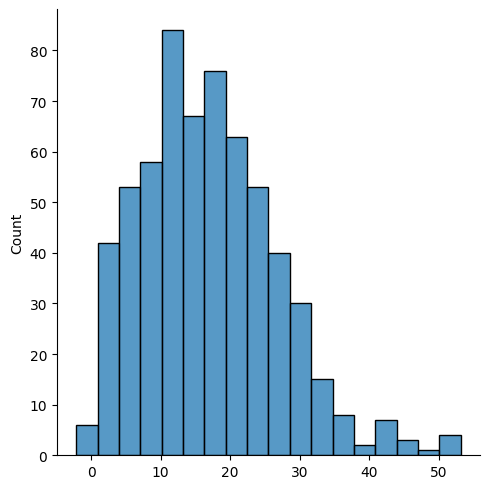

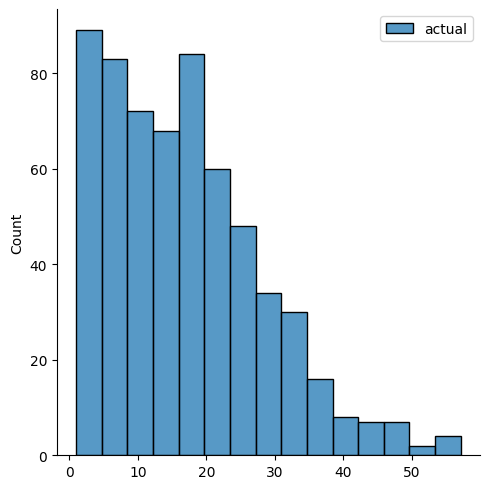

In [244]:
sns.displot(y_pred,label='prediction')
sns.displot(y_train,label='actual')
plt.legend()

In [245]:
#df=df[df.trip_type==2]
#df

/tmp/ipykernel_12729/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

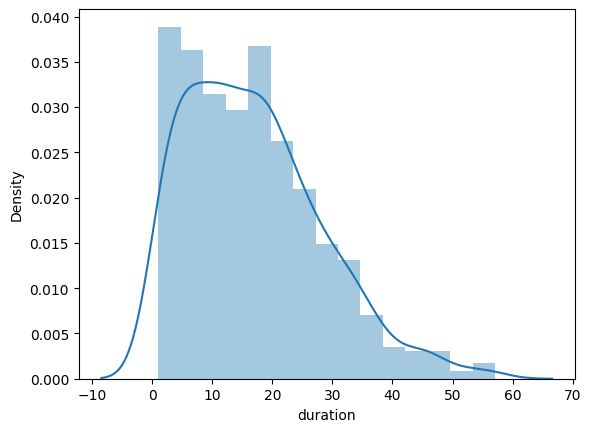

In [246]:
sns.distplot(df.duration)

In [247]:
df.duration.describe(percentiles=[0.05,0.98,0.99])

count    612.000000
mean      16.866449
std       11.411988
min        1.000000
5%         1.686667
50%       15.375000
98%       45.850667
99%       49.217833
max       57.116667
Name: duration, dtype: float64

In [248]:
df_train['PU_DO']=df_train['PULocationID']+'_'+df_train['DOLocationID']
df_val['PU_DO']=df_val['PULocationID']+'_'+df_val['DOLocationID']
df_val

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_DO
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333,43_151
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000,166_239
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667,41_42
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333,168_75
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667,75_75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000,81_90
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000,35_213
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000,74_69
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000,168_215


In [249]:
def read_dataframe(filename):
    df=pd.read_parquet(filename)
    df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
    df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
    df["duration"]=df.lpep_dropoff_datetime-df.lpep_pickup_datetime
    df.duration=df.duration.apply(lambda td: td.total_seconds()/60)
    df=df[(df.duration>=1) & (df.duration<=60)]
    categorical=['PULocationID','DOLocationID']
    #categorical=['PU_DO']
    numerical=['trip_distance']
    df[categorical]=df[categorical].astype(str)
    return df


In [250]:
df_train=read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet')
df_val=read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')
len(df_train) , len(df_val)

(61921, 73908)

In [251]:
dv=DictVectorizer()

#train
train_dict=df[categorical+numerical].to_dict(orient='records')
X_train=dv.fit_transform(train_dict)

#validation
val_dicts=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(val_dicts)


#what we need to find
target='duration'
y_train=df[target].values
y_val=df_val[target].values



In [252]:
#linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_val)
mean_squared_error(y_val,y_pred,squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5558.861727175155

In [253]:
#lasso
lr = Lasso(alpha=0.1)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_val)
mean_squared_error(y_val,y_pred,squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4300.443864744454

In [256]:
#Ridge
lr = Ridge(alpha=1)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_val)
mean_squared_error(y_val,y_pred,squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4570.740638059735

In [262]:
#save model
with open('models','wb') as f_out:
    pic.dump((dv,lr),f_out)

In [255]:
td=df.duration.iloc[0]
td.total_seconds()/60

AttributeError: 'numpy.float64' object has no attribute 'total_seconds'